In [67]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

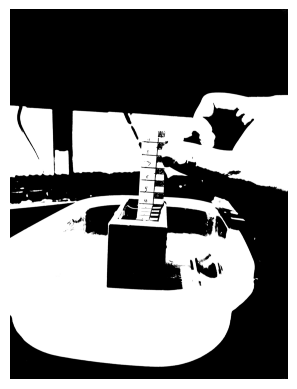

In [68]:
#Acquisition et pré-traitement

# 1. Lecture de la vidéo
imagPath = "../../data/4/IMG_8518.png"
img2 = cv2.imread(imagPath, cv2.COLOR_BGR2RGB)
img = cv2.imread(imagPath, cv2.IMREAD_GRAYSCALE)
orig = img2.copy()



_, bw = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
plt.imshow(bw, cmap="gray")
plt.axis("off")
plt.show()


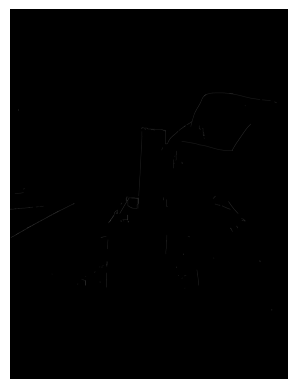

In [69]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20, 90))
closed = cv2.morphologyEx(img2, cv2.MORPH_CLOSE, kernel)

edges = cv2.Canny(closed, 100, 200, apertureSize=3)

plt.imshow(edges, cmap="gray")
plt.axis("off")
plt.show()

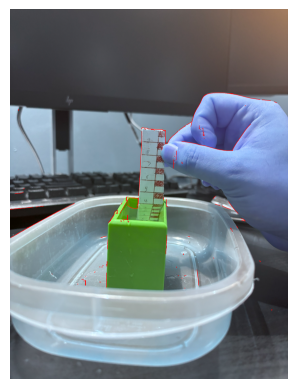

In [70]:
contours, hierarchy = cv2.findContours(
    edges,
    cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_NONE,
    offset=None
)


cv2.drawContours(orig, contours, -1, (255,0,0), 6)

plt.imshow(orig, cmap="gray")
plt.axis("off")
plt.show()

Longueur du contour le plus long : 2055.19 pixels


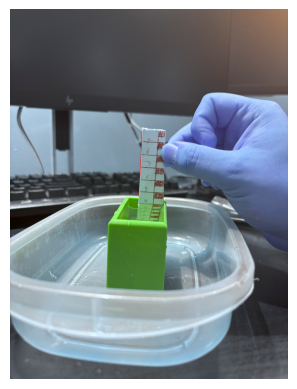

In [74]:
longest_contour = max(contours, key=lambda c: cv2.arcLength(c, False))
longest_length = cv2.arcLength(longest_contour, False)
print(f"Longueur du contour le plus long : {longest_length:.2f} pixels")

output = img2.copy()
cv2.drawContours(output, [longest_contour], -1, (255, 0, 0), thickness=6)

plt.imshow(output, cmap="gray")
plt.axis("off")
plt.show()

5


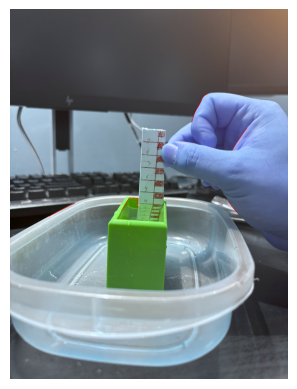

In [71]:
verticals = []
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    if h == 0 or w == 0:
        continue
    ratio = h / float(w)
    # on garde les contours dont la hauteur est, par ex., au moins 2× la largeur
    if ratio > 0.01 and cv2.contourArea(c) > 100:
        verticals.append(c)

imageCopy = img2.copy()
print(len(verticals))
# on dessine uniquement ces contours
cv2.drawContours(imageCopy, verticals, -1, (255,0,0), 6)
plt.imshow(imageCopy, cmap="gray")
plt.axis("off")
plt.show()

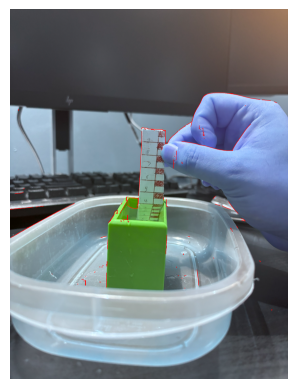

In [72]:
# Après votre appel à HoughLinesP…
lines = cv2.HoughLinesP(
    edges,
    rho=2,
    theta=np.pi/180,
    threshold=150,
    minLineLength=200,
    maxLineGap=80
)

if lines is None:
    print("Aucune ligne détectée")
else:
    for l in lines:
        x1, y1, x2, y2 = l[0]   # l a la forme [[x1, y1, x2, y2]]
        # filtrez les quasi-verticales
        if abs(x1 - x2) < 10 and abs(y2 - y1) > 50:
            cv2.line(orig, (x1, y1), (x2, y2), (255, 0, 0), 3)

    # Affichage
    plt.imshow(orig)
    plt.axis("off")
    plt.show()

In [73]:
cnts, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
candidates = []
for c in cnts:
    area = cv2.contourArea(c)
    if area < 50: continue
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02*peri, True)
    if len(approx)==4:
        x,y,w,h = cv2.boundingRect(approx)
        ratio = max(w,h)/min(w,h)
        if ratio>5:  # règle très allongée
            candidates.append((area, approx))
# Garder le plus grand candidat
_, ruler_cnt = max(candidates, key=lambda x: x[0])

bwout = img2.copy()

# 2. Dessinez le contour le plus grand (ruler_cnt) en rouge
cv2.drawContours(bwout, [ruler_cnt], contourIdx=-1, color=(255,0,0), thickness=6)

# 3. Affichez avec Matplotlib
plt.imshow(bwout)
plt.axis("off")
plt.show()



ValueError: max() iterable argument is empty